# **Rice Image Classification using CNN**

<img src="rice_image.jpg" alt="My Image" width="1000" height="400"/>

### Introduction

Rice is a staple food for billions of people around the world, making it an important agricultural product. Different types of rice have unique characteristics, such as texture, shape, and color, which are key to assessing quality and meeting market needs. In countries like Turkey, where rice farming plays a major role in the economy, correctly identifying rice varieties is crucial for maintaining high standards in production and distribution.

Traditionally, classifying rice varieties has been done by hand, which is slow and often leads to mistakes. However, with the rise of machine learning, especially in image recognition, there is now a chance to automate and improve this process. Convolutional Neural Networks (CNNs) are particularly good at analyzing images and recognizing patterns. 

### Problem Statement

This project aims to create a CNN model that can accurately classify five types of rice—Arborio, Basmati, Ipsala, Jasmine, and Karacadag—using a dataset of 75,000 grain images.

### Dataset [Link](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset/data)

1. The dataset includes **75,000 grain images** in total.
 - **15,000 images** for each of the five rice varieties: Arborio, Basmati, Ipsala, Jasmine, and Karacadag.


2. A dataset was created with **106 features** derived from the images, including:
  - **12 morphological features** (e.g., length, width, etc.).
  - **4 shape features** (e.g., roundness, aspect ratio, etc.).
  - **90 color features** (e.g., RGB values, color intensity, etc.).

### Step 1: Load Data 

In [ ]:
"""
This script imports necessary libraries and prints the file paths 
of all files in the directory '/kaggle/input'.
"""
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
"""
The script imports the os module, sets a root directory, and then lists all subfolders within that 
directory,storing them in a list called folders, which is then printed.
"""
import os
root_dir = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset' # root directory
folders=[]
for x in os.listdir(root_dir):
    folders.append(x)
print(folders)

['Karacadag', 'Basmati', 'Jasmine', 'Rice_Citation_Request.txt', 'Arborio', 'Ipsala']


In [4]:
"""
Removes the file 'Rice_Citation_Request.txt' from the list of subfolders.
"""
folders.remove('Rice_Citation_Request.txt')

In [5]:
folders

['Karacadag', 'Basmati', 'Jasmine', 'Arborio', 'Ipsala']

In [6]:
"""
Creates a copy of the `folders` list and assigns it to `rice_labels`.
"""
rice_labels= folders.copy()
rice_labels

['Karacadag', 'Basmati', 'Jasmine', 'Arborio', 'Ipsala']

### Step 2 : Visualization of Data

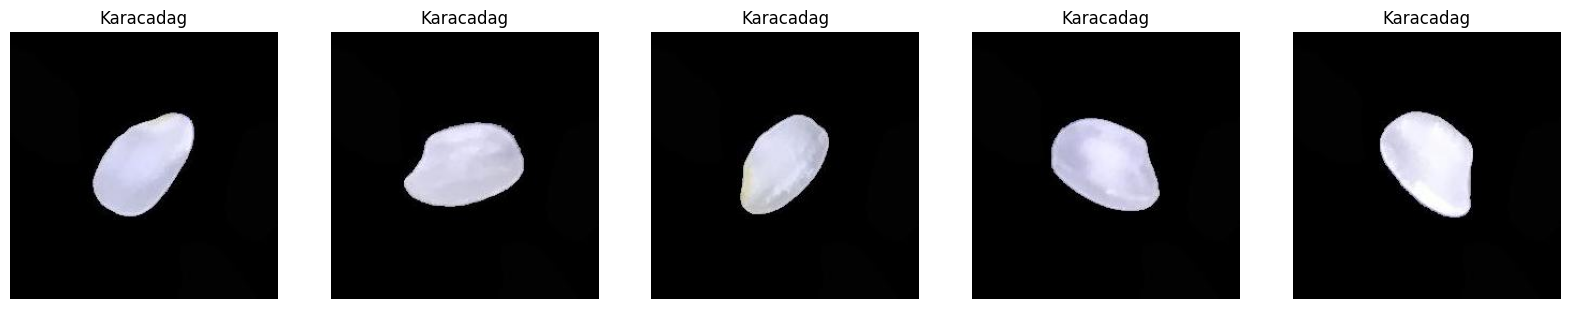

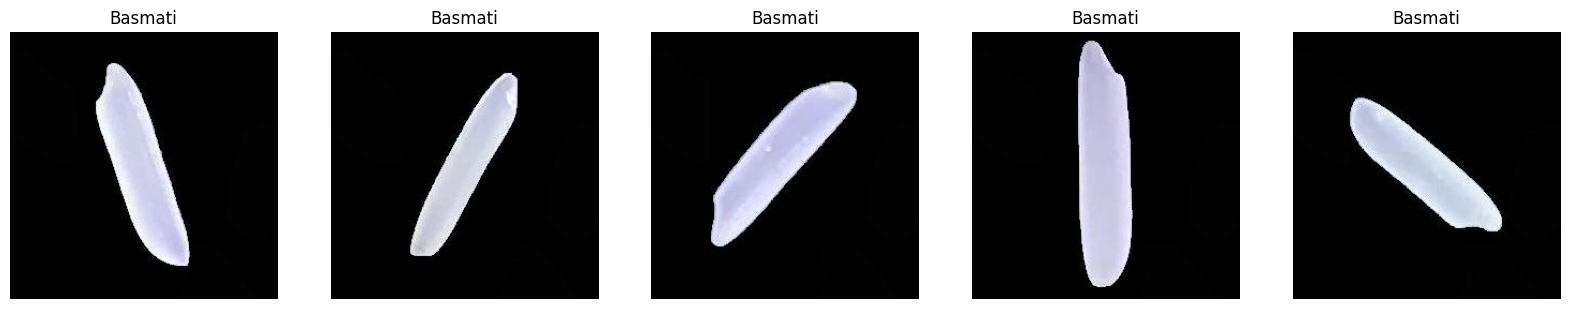

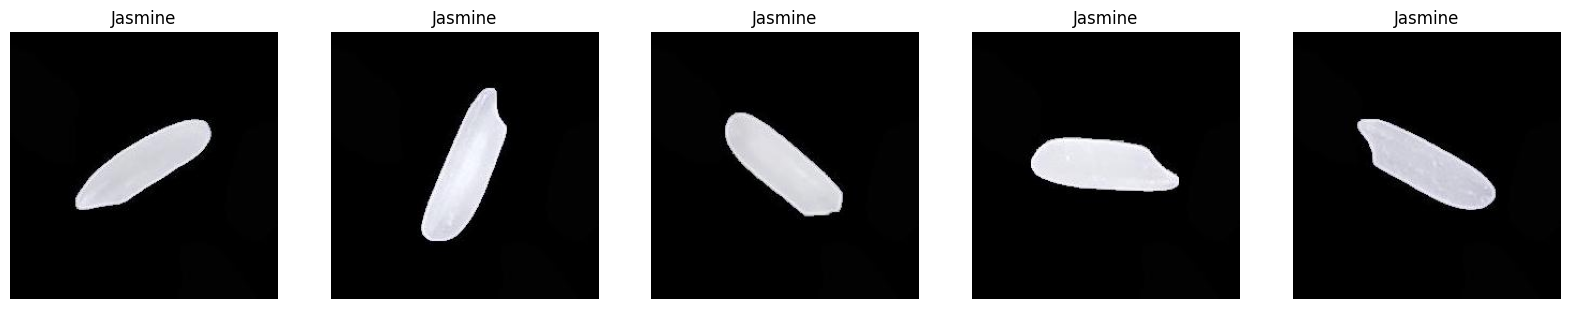

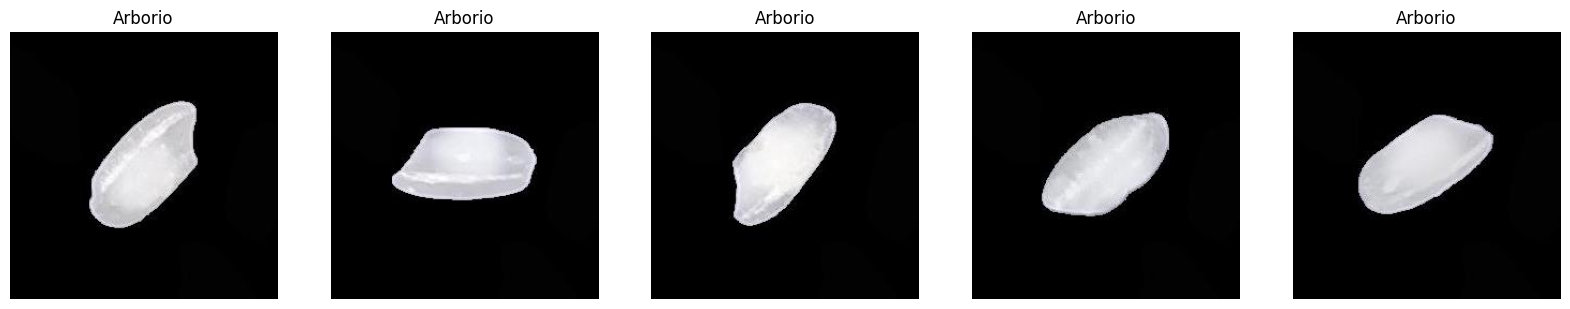

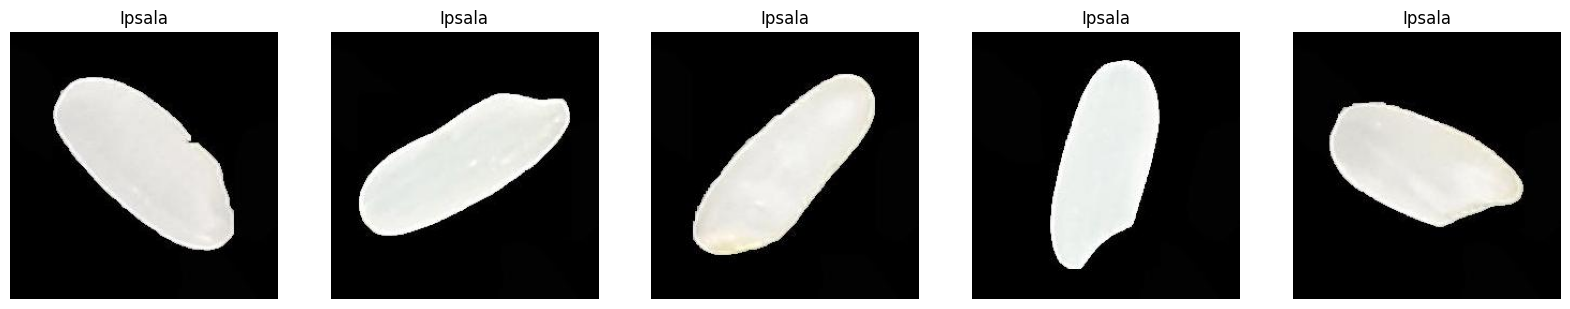

In [7]:
"""
Displays a sample of 5 random rice images for each rice class.

1. Imports:
   - `Image` from `PIL` for image handling.
   - `random` as `rn` for random selection.
   - `matplotlib.pyplot` as `plt` for plotting.

2. Function `samples_rice_images(rice_class)`:
   - Lists files in the specified `rice_class` directory.
   - Randomly selects 5 images.
   - Displays these images in a row with titles.

3. Iterates through `rice_labels` and calls `samples_rice_images` for each class.
"""
from PIL import Image
import random as rn
import matplotlib.pyplot as plt

def samples_rice_images(rice_class):
    rice_dir = os.listdir(os.path.join(root_dir, rice_class))
    random_selection = rn.choices(rice_dir, k=5)

    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    for i, img_name in enumerate(random_selection):
        img_path = os.path.join(root_dir, rice_class, img_name)
        img = Image.open(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(rice_class)
    plt.show()
for x in rice_labels:
   samples_rice_images(x)

In [8]:
"""
Counts the number of images in each subfolder within the root directory and prints the results.

1. Initializes an empty dictionary `count_images`.
2. Iterates through `rice_labels`, counting the files in each subfolder.
3. Stores the count in `count_images` with the folder name as the key.
4. Prints the dictionary with folder names and their corresponding image counts.
"""
count_images={}
for label in rice_labels:
    count_images[label]=len(os.listdir(os.path.join(root_dir,label)))
print(count_images)

{'Karacadag': 15000, 'Basmati': 15000, 'Jasmine': 15000, 'Arborio': 15000, 'Ipsala': 15000}


In [9]:
"""
Creates a list of tuples containing image file paths and their corresponding rice class labels.

1. Initializes an empty list `rice_list`.
2. Iterates through each rice class in `rice_labels`.
3. Constructs full file paths for each image in the class directory.
4. Appends tuples of (full image path, rice class) to `rice_list`.
"""
rice_list = []
for rice_class in rice_labels:
    class_dir = os.path.join(root_dir, rice_class)
    for img_path in os.listdir(class_dir):
        full_path = os.path.join(class_dir, img_path)
        rice_list.append((full_path, rice_class))

In [10]:
"""
Creates a DataFrame from `rice_list` with columns 'path' and 'label'.

1. Converts the list of tuples (`rice_list`) into a pandas DataFrame.
2. Names the columns 'path' (for image file paths) and 'label' (for rice class labels).
"""
data= pd.DataFrame(rice_list,columns=['path','label'])

In [11]:
data

,path,label
0,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
1,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
2,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
3,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
4,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
...,...,...
74995,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala
74996,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala
74997,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala
74998,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala


**Shuffling Data: To Prevent Bias in Training Data**

**Reason:** Shuffling the data prevents the model from learning patterns based on the order of the data, which could otherwise introduce bias. If the data is not shuffled and is instead ordered (e.g., by class or time), the model might learn to recognize the order rather than the actual features of the data. This can lead to overfitting and poor generalization to unseen data. Shuffling ensures that each batch or epoch of training contains a representative mix of all classes and examples, leading to more accurate and reliable model performance.

In [12]:
"""
Shuffles the DataFrame rows and resets the index.

1. Shuffles all rows in the DataFrame `data` using `frac=1`.
2. Resets the index of the shuffled DataFrame, dropping the old index.
"""
data = data.sample(frac=1).reset_index(drop=True)
data

,path,label
0,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala
1,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Arborio
2,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
3,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Jasmine
4,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Jasmine
...,...,...
74995,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Basmati
74996,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Ipsala
74997,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Karacadag
74998,/kaggle/input/rice-image-dataset/Rice_Image_Da...,Jasmine


### Step 3 : Data Splitting for Training, Validating and Testing

**Reason for Splitting the Data:**

Splitting the data into training, validation, and testing sets is essential for building a robust machine learning model. The training set is used to train the model, the validation set helps tune hyperparameters and avoid overfitting, and the testing set provides an unbiased evaluation of the model's performance on unseen data. This process ensures that the model generalizes well and performs effectively in real-world scenarios.

In [13]:
"""
Splits the dataset into training, validation, and testing sets.

1. Computes sizes for each set: 70% training, 15% validation, 15% testing.
2. Splits the DataFrame `data` accordingly.
3. Prints the sizes of each set.

Variables:
- `train_size`: Number of training samples.
- `val_size`: Number of validation samples.
- `test_size`: Number of testing samples.
"""
train_size = int(0.7 * len(data))
val_size = int(0.15 * len(data))
test_size = int(0.15*len(data))
print(f"train_size:{train_size} -----val_size:{val_size}----test_size:{test_size}")

train_data = data.iloc[:train_size]
val_data = data.iloc[train_size:train_size + val_size]
test_data = data.iloc[train_size + val_size:]

# Display the sizes of each set
print(f'Training set size: {len(train_data)}')
print(f'Validation set size: {len(val_data)}')
print(f'Test set size: {len(test_data)}')

train_size:52500 -----val_size:11250----test_size:11250
Training set size: 52500
Validation set size: 11250
Test set size: 11250


In [14]:
"""
Loads an image from the dataset and prints its dimensions.

1. Retrieves the path of the first image in the DataFrame `data`.
2. Opens the image using `PIL`.
3. Obtains and prints the width and height of the image.
"""
image_path = data["path"][0]
image = Image.open(image_path)
width, height = image.size
print(f"height,width:{height,width}")

height,width:(250, 250)


In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
batch_size = 32
img_height = 224
img_width = 224

### Step 4: Data Augmentation and Generator Setup

- **Data Augmentation:** Increases the size and diversity of the training dataset by applying transformations (like rotation, flip, and zoom) to existing images. This helps prevent overfitting and improves the model's ability to generalize to new, unseen data.

- **ImageDataGenerator:** A tool in Keras that efficiently applies data augmentation in real-time during model training. It generates batches of augmented images on-the-fly, saving memory and making it easier to handle large datasets. This ensures that the model is trained on a varied set of images without requiring manual preprocessing.

In [17]:
"""
Sets up `ImageDataGenerator` for data augmentation and normalization, creating image generators 
for training, validation, and testing. The training generator applies random transformations and 
shuffling, while the validation and test generators use the same transformations without shuffling.
This process prepares the data for robust model training and evaluation.
"""
# Normalization
data_generator = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = data_generator.flow_from_dataframe(
  dataframe=train_data,
  x_col="path",
  y_col="label",
  target_size=(img_height, img_width),
  batch_size=batch_size,
  class_mode="categorical",
  shuffle=True,
  seed=42
)

validation_generator = data_generator.flow_from_dataframe(
  dataframe=val_data,
  x_col="path",
  y_col="label",
  target_size=(img_height, img_width),
  batch_size=batch_size,
  class_mode="categorical",
  shuffle=False,
  seed=42
)

test_generator = data_generator.flow_from_dataframe(
  dataframe=test_data,
  x_col="path",
  y_col="label",
  target_size=(img_height, img_width),
  batch_size=batch_size,
  class_mode="categorical",
  shuffle=False,
  seed=42
)

Found 52500 validated image filenames belonging to 5 classes.
Found 11250 validated image filenames belonging to 5 classes.
Found 11250 validated image filenames belonging to 5 classes.


In [18]:
"""
Prints the shapes of image and label batches from the training, validation, and test generators, 
including the number of batches, for a quick overview of batch dimensions.
"""
for image_batch, labels_batch in train_generator:
    print(f"Train Shape: {image_batch.shape} (Batches = {len(train_generator)})")
    print(f"Train Label Shape: {labels_batch.shape}\n")
    break

for image_batch, labels_batch in validation_generator:
    print(f"Validation Shape: {image_batch.shape} (Batches = {len(validation_generator)})")
    print(f"Validation Label Shape: {labels_batch.shape}\n")
    break

for image_batch, labels_batch in test_generator:
    print(f"Test Shape: {image_batch.shape} (Batches = {len(test_generator)})")
    print(f"Test Label Shape: {labels_batch.shape}\n")
    break

Train Shape: (32, 224, 224, 3) (Batches = 1641)
Train Label Shape: (32, 5)

Validation Shape: (32, 224, 224, 3) (Batches = 352)
Validation Label Shape: (32, 5)

Test Shape: (32, 224, 224, 3) (Batches = 352)
Test Label Shape: (32, 5)



### Step 5 : Training the CNN Model

In [19]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

**CNN Model Layers Explanation**

- **Input Layer**: Defines the dimensions of the input images, specifying that each image is 224x224 pixels in size with 3 color channels (RGB), setting the stage for further processing by the network.

- **Convolutional Layers**: Apply convolutional filters to the input images to detect various features such as edges, textures, and patterns, with increasing complexity in deeper layers to capture higher-level features.

- **MaxPooling2D Layers**: Perform down-sampling by selecting the maximum value in each pooling window, reducing the spatial size of the feature maps to decrease computational load and enhance feature extraction by making the detection more robust to slight translations in the image.

- **Flatten Layer**: Transforms the 2D arrays of features from the convolutional layers into a 1D vector, allowing these features to be input into fully connected layers for final classification.

- **Dense Layers**: Utilize fully connected neurons to interpret the flattened features and perform the classification; the first dense layer with ReLU activation learns complex patterns, while the final dense layer with softmax activation outputs class probabilities for the classification task.

**Why ReLU and Softmax ?**
- **ReLU**: Used in hidden layers to introduce non-linearity and improve learning efficiency.
- **Softmax**: Used in the output layer to provide a probability distribution over the classes, making it suitable for multi-class classification problems.

In [20]:
n_classes = 5
CNN_model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(n_classes, activation='softmax'),
])

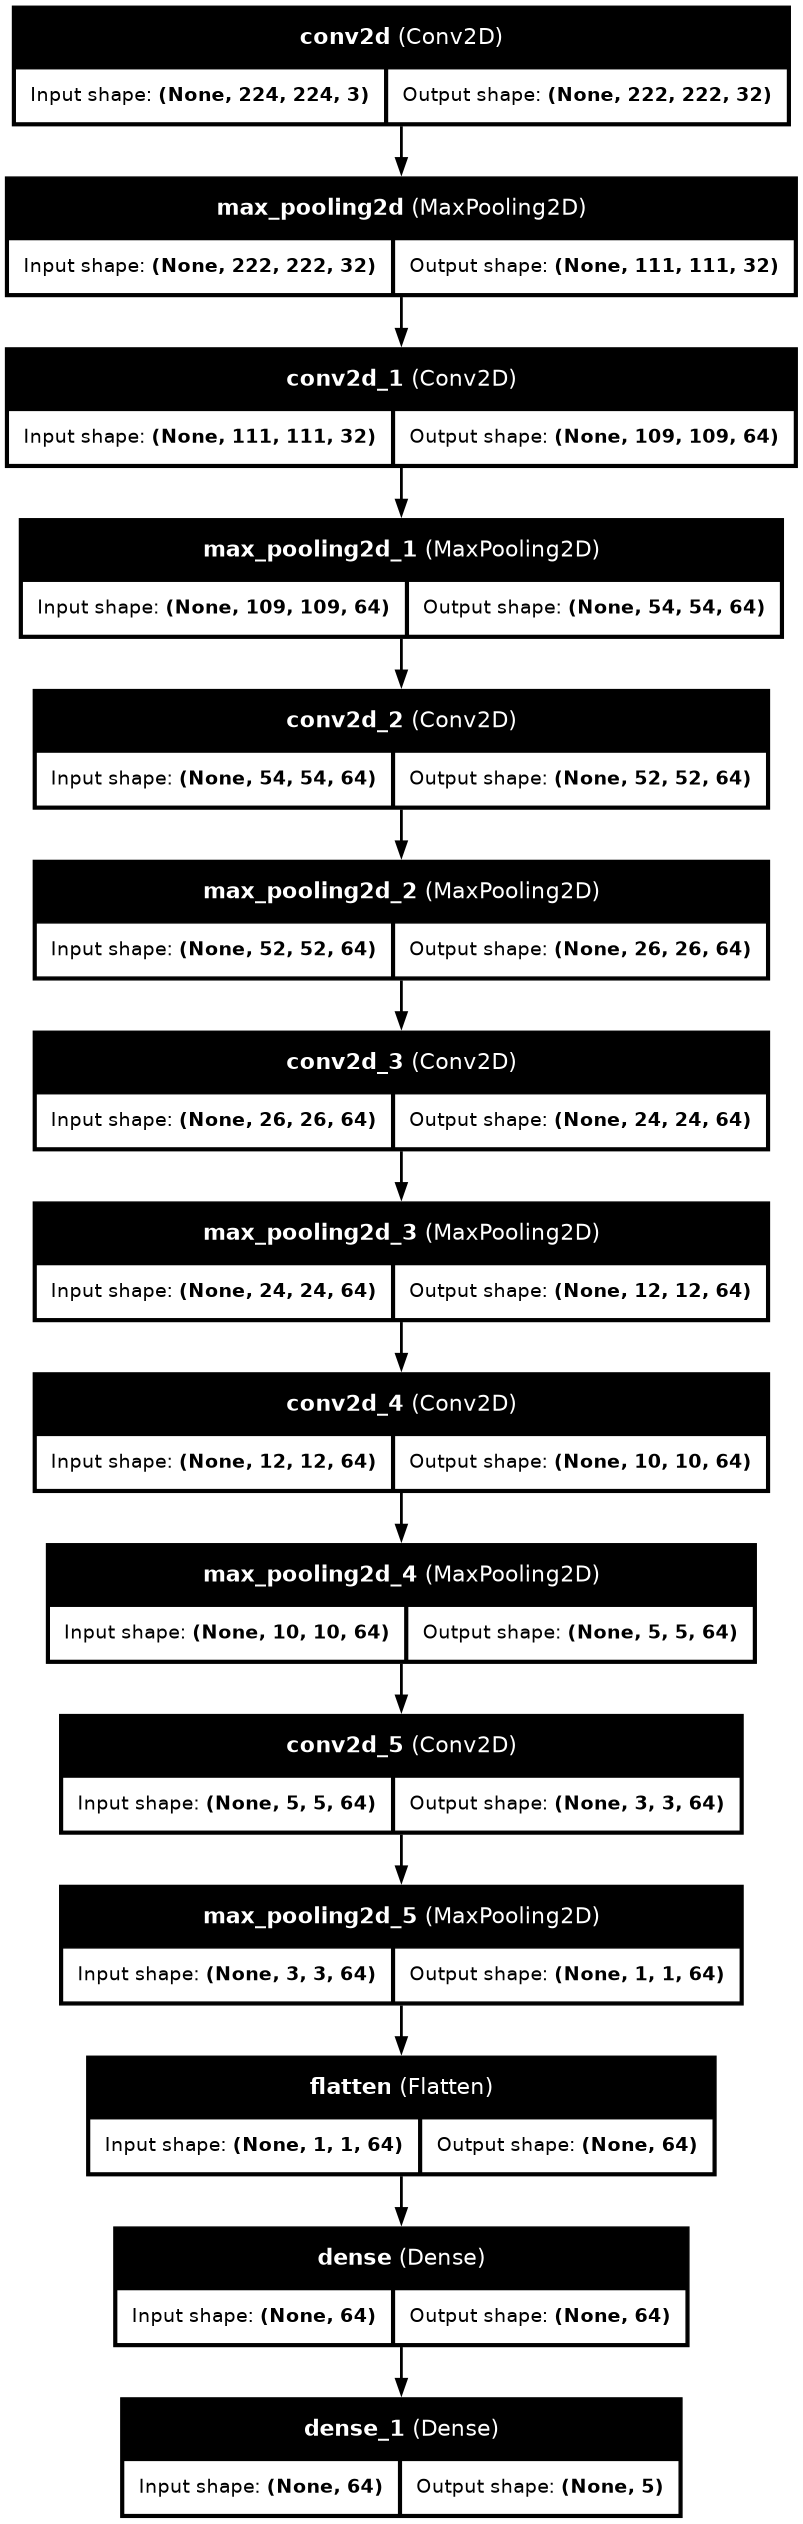

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(CNN_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi=100, expand_nested=True)

In [22]:
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,589 (670.27 KB)

 Trainable params: 171,589 (670.27 KB)

 Non-trainable params: 0 (0.00 B)

**Early Stopping:** Helps to stop training when the model's performance on the validation set stops improving, helping to prevent overfitting and saving computational resources.

In [23]:
"""
Parameters:
- `monitor='val_loss'`: Monitors the validation loss to determine when to stop training.
- `patience=3`: Stops training after 3 epochs without improvement in validation loss.
- `restore_best_weights=True`: Restores model weights to the best state (lowest validation loss)
after stopping.
"""
# Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

- **Loss (`CategoricalCrossentropy`)**: Used for evaluating how well the model's predicted probabilities match the true labels in multi-class classification.
- **Optimizer (`Adam`)**: Chosen for its efficiency in training deep networks and its ability to adapt learning rates for each parameter, improving training performance.
- **Metric (`accuracy`)**: Selected to track the proportion of correct predictions, giving a clear and simple measure of the model’s classification performance.

In [24]:
CNN_model.compile(loss=CategoricalCrossentropy(),
                  optimizer=Adam(learning_rate=0.001),
                  metrics=['accuracy'])

In [26]:
"""
Trains the CNN model using the training and validation data.

Parameters:
- `train_generator`: Yields batches of training images and labels.
- `epochs=50`: Maximum number of training epochs.
- `validation_data=validation_generator`: Yields validation data for performance monitoring.
- `callbacks=[early_stopping]`: Stops training early if validation loss doesn't improve.
- `verbose=1`: Displays training progress after each epoch.

Purpose:
- Trains the model while monitoring validation performance and applying early 
stopping to prevent overfitting.
"""
CNN= CNN_model.fit(
    train_generator,
    epochs=50, 
    validation_data=validation_generator,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 922s 560ms/step - accuracy: 0.8621 - loss: 0.3514 - val_accuracy: 0.9500 - val_loss: 0.1525
Epoch 2/50
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 695s 422ms/step - accuracy: 0.9657 - loss: 0.1019 - val_accuracy: 0.9692 - val_loss: 0.0882
Epoch 3/50
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 715s 434ms/step - accuracy: 0.9723 - loss: 0.0829 - val_accuracy: 0.9830 - val_loss: 0.0539
Epoch 4/50
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 708s 430ms/step - accuracy: 0.9761 - loss: 0.0730 - val_accuracy: 0.9872 - val_loss: 0.0385
Epoch 5/50
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 729s 443ms/step - accuracy: 0.9806 - loss: 0.0570 - val_accuracy: 0.9852 - val_loss: 0.0449
Epoch 6/50
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 742s 451ms/step - accuracy: 0.9814 - loss: 0.0574 - val_accuracy: 0.9769 - val_loss: 0.0632
Epoch 7/50
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 741s 450ms/step - accuracy: 0.9840 - loss: 0.0499 - val_accuracy: 0.9876 - val_loss: 0.0332
Epoch 8/50
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 738s 449ms/step - ac

### Step 6 : Evaluating the Model

**1. Evaluation on Training Data**
* Evaluates the model's performance on the training data by computing the loss and accuracy.
* **Why It’s Used:** This helps in understanding how well the model has learned from the training data, providing insight into whether the model might be overfitting (high training accuracy with lower test accuracy) or underfitting (low accuracy on both training and test data).

**2. Evaluation on Test Data**
*  Evaluates the model's performance on the test data, which is unseen during training.
* **Why It’s Used:** Testing on unseen data provides an unbiased evaluation of the model’s generalization ability, indicating how well the model will perform in real-world scenarios.

In [27]:
# Evaluate on the training data
train_loss, train_accuracy = CNN_model.evaluate(train_generator, verbose=1)
print(f'Training accuracy: {train_accuracy:.4f}')

# Evaluate on the test data
test_loss, test_accuracy = CNN_model.evaluate(test_generator, verbose=1)
print(f'Test accuracy: {test_accuracy:.4f}')

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 605s 369ms/step - accuracy: 0.9903 - loss: 0.0275
Training accuracy: 0.9911
352/352 ━━━━━━━━━━━━━━━━━━━━ 154s 438ms/step - accuracy: 0.9898 - loss: 0.0335
Test accuracy: 0.9900


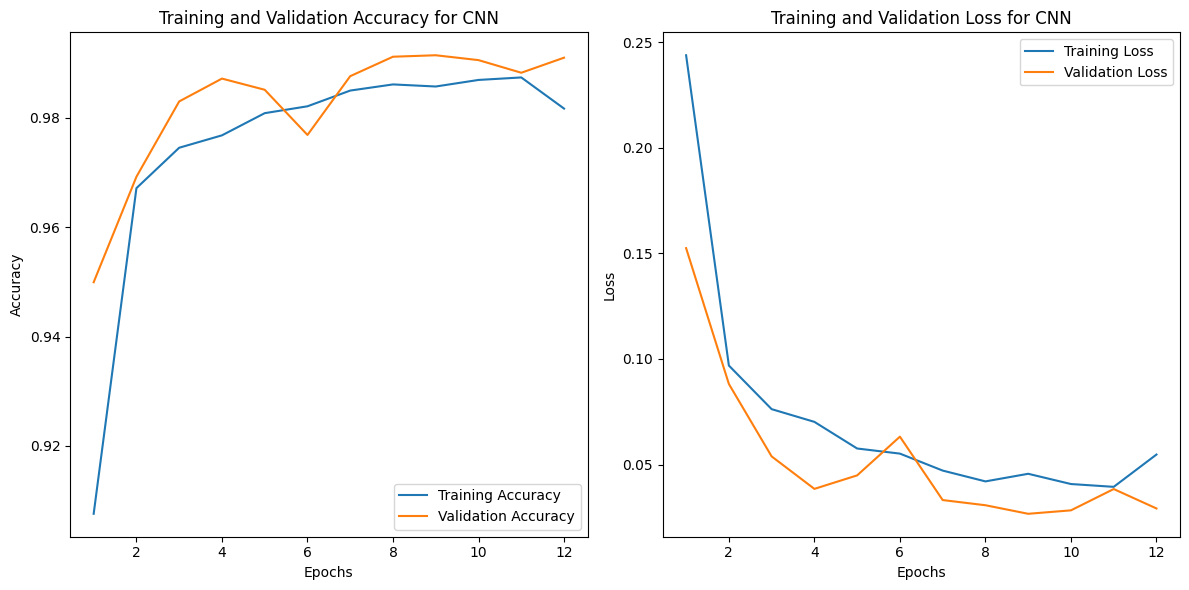

In [28]:
"""
- Plots training and validation metrics for the CNN model.
- To visually assess the model’s performance across epochs, allowing for evaluation of 
overfitting, learning trends, and generalization ability.
"""
# Retrieve metrics from the training history
acc = CNN.history['accuracy']
val_acc = CNN.history['val_accuracy']
loss = CNN.history['loss']
val_loss = CNN.history['val_loss']

epochs_range = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for CNN')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for CNN')
plt.legend()

plt.tight_layout()
plt.show()

**Inference**

1. **Accuracy Plot**
   - **Training Accuracy**: Increases steadily and reaches over 98% within the first few epochs, suggesting the model is learning effectively from the training data.
   - **Validation Accuracy**: Also increases rapidly, closely following the training accuracy. The validation accuracy stays slightly above the training accuracy for most epochs, indicating that the model generalizes well and is not overfitting.


2. **Loss Plot**
   - **Training Loss**: Shows a steep decline in the first few epochs, indicating that the model is quickly learning to minimize errors. After the initial drop, the training loss continues to decrease more gradually.
   - **Validation Loss**: Follows a similar pattern to the training loss, decreasing rapidly at first and then stabilizing. The validation loss stays close to the training loss, which is a good sign that the model is not overfitting. However, there is a slight increase in training loss after epoch 8, which might indicate some minor overfitting, but this does not seem significant.

### Step 7 : CNN Model Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


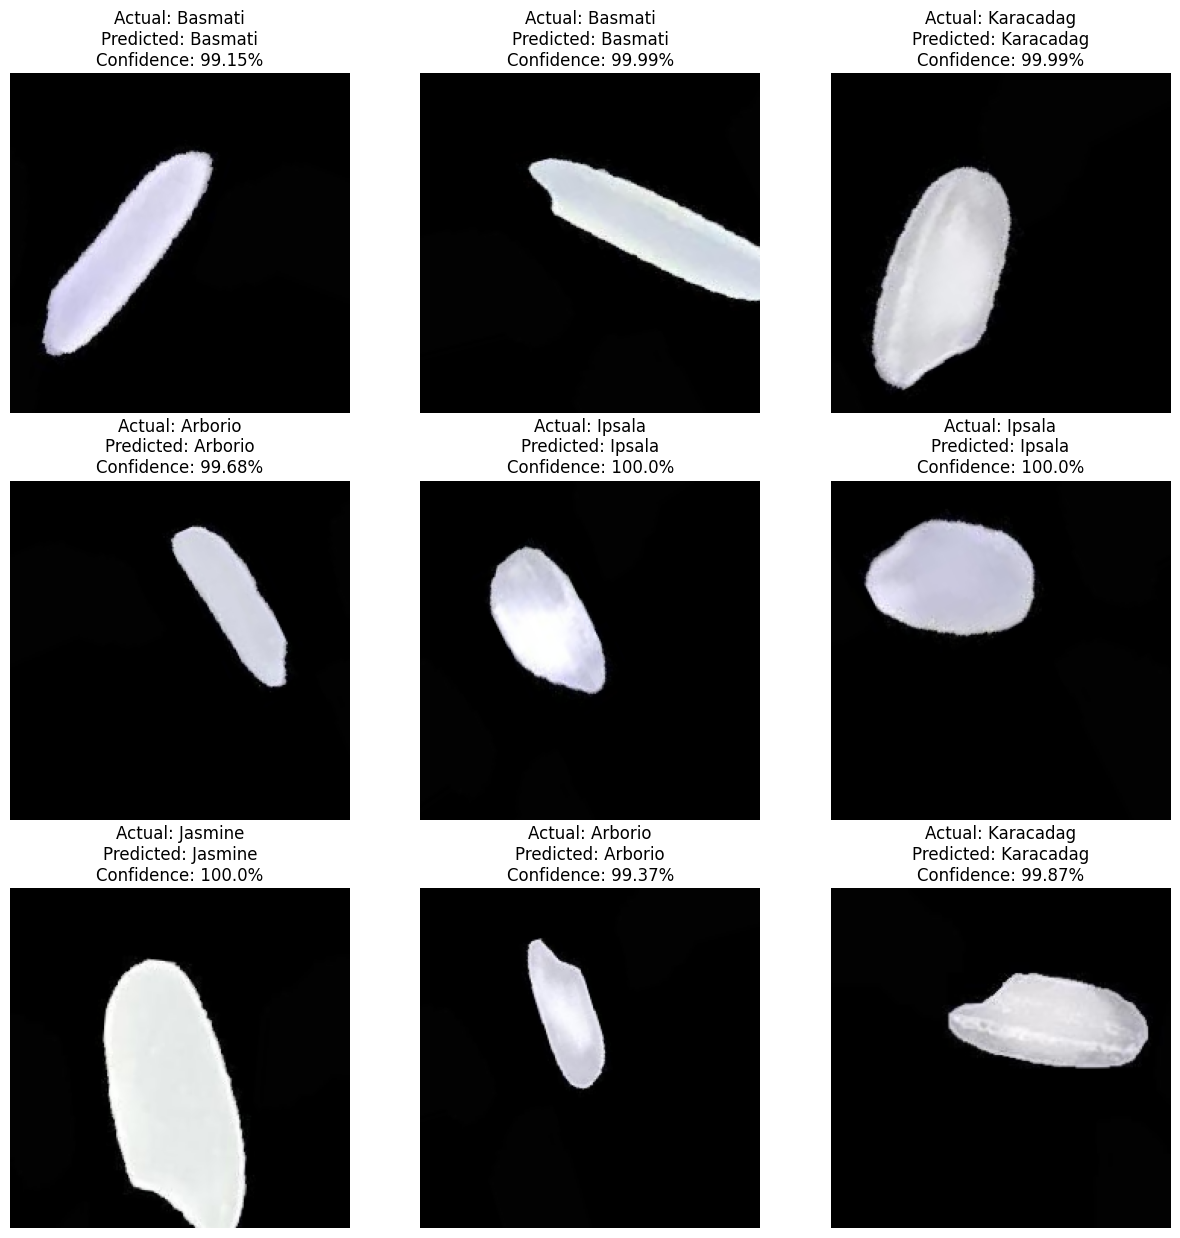

In [31]:
"""
Predict and visualize rice grain classification results using a trained CNN model.
"""
def predict(CNN_model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = CNN_model.predict(img_array)
    
    predicted_class = rice_labels[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

# Plotting the test results
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].astype('float32'))
        
        predicted_class, confidence = predict(CNN_model, images[i])
        
        # Convert one-hot encoded label to an index if necessary
        if labels.ndim > 1:  # If labels are one-hot encoded
            actual_class_index = np.argmax(labels[i])
        else:  # If labels are already integer indices
            actual_class_index = labels[i]
        
        actual_class = rice_labels[actual_class_index]
        
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence}%")
        plt.axis("off")
    
    break

plt.show()

### Inference:

1. **Model Accuracy**:
   - The model accurately predicted the type of rice grain in all displayed images. The actual label matches the predicted label for each grain.
   
   
2. **Confidence Levels**:
   - The model shows very high confidence in its predictions, with confidence levels ranging from **99.15% to 100.0%**. This high confidence indicates that the model is performing very well and is certain about its predictions.


3. **Consistency Across Classes**:
   - The model consistently identifies different rice types (Basmati, Arborio, Ipsala, Jasmine, and Karacadag) with high accuracy, suggesting that it has learned to differentiate between these types effectively.

**These results suggest that the model is highly capable of correctly classifying different rice types with a high degree of confidence, making it suitable for practical applications where such differentiation is required.**